In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-1, 1],
    c1 = [0.1, 2.0],
    c2 = [0.5, 2.0],
    w = 1.2,
    w_decay = 0.95))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

0.7480909401011244
update global 0.6898750946900555
update local, 0.7342760317793516
Iteration 118/300: 	0.6898750946900555
update global 0.6898750946900555
update local, 0.7548271963529498
Iteration 119/300: 	0.6898750946900555
update global 0.6898750946900555
update local, 0.7360777097327686
Iteration 120/300: 	0.6898750946900555
update local, 0.75196560298171
update local, 0.7483991105979848
update local, 0.7488179429669246
update global 0.6898750946900555
update local, 0.8502945944527599
Iteration 121/300: 	0.6898750946900555
update local, 0.7393815227758105
update local, 0.816978026773328
update global 0.6898750946900555
update local, 0.752388428304797
update local, 0.7605315591687354
Iteration 122/300: 	0.6898750946900555
update global 0.6898750946900555
update local, 0.7577667236328125
update local, 0.7453130561614705
update local, 0.8233762366749416
Iteration 123/300: 	0.6898750946900555
update global 0.6898750946900555
update local, 0.7555654650536653
update local, 0.739975831

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555, 0.6898750946900555,

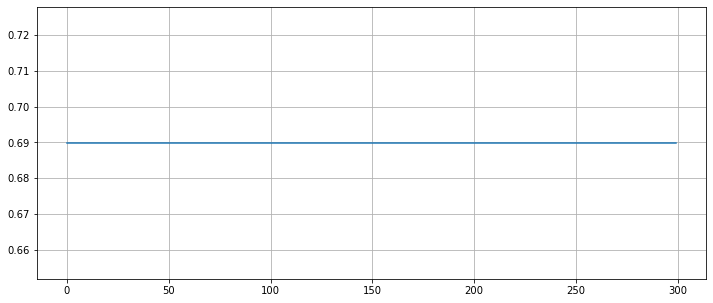

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.7306989  0.15382457 0.11547655]
[1. 0. 0.] <-> [0.73937815 0.14880168 0.11182023]
[1. 0. 0.] <-> [0.73885936 0.14844763 0.11269299]
[0. 0. 1.] <-> [0.7440154  0.14558929 0.11039527]
[1. 0. 0.] <-> [0.7387059  0.14910148 0.11219262]
[1. 0. 0.] <-> [0.7416018  0.14603263 0.11236561]
[1. 0. 0.] <-> [0.737939   0.14995597 0.112105  ]
[1. 0. 0.] <-> [0.6706514  0.20195372 0.12739486]
[1. 0. 0.] <-> [0.72551453 0.15783802 0.11664737]
[1. 0. 0.] <-> [0.7162338  0.16471957 0.11904663]
[1. 0. 0.] <-> [0.7176818  0.16312882 0.11918932]
[0. 1. 0.] <-> [0.09535052 0.79381365 0.11083588]
[1. 0. 0.] <-> [0.7358603  0.15066488 0.11347478]
[0. 0. 1.] <-> [0.74446684 0.14512362 0.11040957]
[1. 0. 0.] <-> [0.7404025  0.14671847 0.11287906]
[1. 0. 0.] <-> [0.7206729  0.16223702 0.11709012]
[1. 0. 0.] <-> [0.73220485 0.15243787 0.11535729]
[1. 0. 0.] <-> [0.73251253 0.15305011 0.11443734]
[1. 0. 0.] <-> [0.7419031  0.14518084 0.11291606]
[1. 0. 0.] <-> [0.7368762  0.15007916 0.11304463]
